### Student Loans Risk analysis with Deep Learning model

In [36]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from pathlib import Path
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix



#### Get the data and Prepare it for a neural network model

#### Step 1: Read the **student-loans.csv** file into a DataFrame. Review the DF, look for columns that could define features and target variables.

In [2]:
# Read the csv into a Pandas DataFrame
file_path = "https://static.bc-edx.com/ai/ail-v-1-0/m18/lms/datasets/student-loans.csv"
loans_df = pd.read_csv(file_path)

# Review the DataFrame
loans_df.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [3]:
# Review the data types associated with the columns
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   payment_history         1599 non-null   float64
 1   location_parameter      1599 non-null   float64
 2   stem_degree_score       1599 non-null   float64
 3   gpa_ranking             1599 non-null   float64
 4   alumni_success          1599 non-null   float64
 5   study_major_code        1599 non-null   float64
 6   time_to_completion      1599 non-null   float64
 7   finance_workshop_score  1599 non-null   float64
 8   cohort_ranking          1599 non-null   float64
 9   total_loan_score        1599 non-null   float64
 10  financial_aid_score     1599 non-null   float64
 11  credit_ranking          1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# Check the credit ranking value counts
loans_df["credit_ranking"].value_counts()

credit_ranking
1    855
0    744
Name: count, dtype: int64

#### Construct the features (X) and targets (y) datasets from the preprocessed data. Define the target dataset using **"credit_ranking"** column of the preprocessed DataFrame, while the remaining columns will constitute the features dataset.

In [5]:
# Define the target set y from credit_ranking column
y = loans_df["credit_ranking"]

# Display array sample of target y 
y[:10].values

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0])

In [6]:
# Define fetures set X, select all columns besides credit_ranking 
X = loans_df.drop(columns="credit_ranking")

# Reeview features
X.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


#### Step 3: Now let's split the target and features sets into training and testing

In [7]:
# Split the preprocessed data into a training and testing datasets
# Set random state
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#### Step 4: Use `StandardSaler` to scale the featurees data

In [8]:
# Create a StandardScaler instance
Scaler = StandardScaler()

# Fit the scaler to the features training dataset
Scaler.fit(X_train)

# Scale the data
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)


#### Step 5: Create a Neural Network Model
In this step we'll create a deep neural network. We'll assign the number of input features, number of layers, and number of neurons for each layer utilizing Keras.



In [9]:
# Define the number of input features for the model
input_features = len(X_train.columns)

# Review the number of features
input_features

11

In [10]:
# Define the number of hidden nodes for the 1st hidden layer
hidden_nodes_layer1 = 6

# Define the number of hidden nodes for the 2dn hidden layer
hidden_nodes_layer2 = 3

# Define the number of neurons in the output layer 
output_nodes = 1 


In [11]:
# Create a Sequential model 
nn_model = Sequential()

# Add the first hidden layer 
nn_model.add(Dense(units=hidden_nodes_layer1,
                   input_dim=input_features, activation="relu"))



Metal device set to: Apple M1 Max


In [17]:
# Add second hidden layer
nn_model.add(Dense(units=hidden_nodes_layer2, activation="relu"))
            

In [18]:
# Add the output layer to the model.
#Specify teh number of output neurons with activation function.
nn_model.add(Dense(units=output_nodes, activation="sigmoid"))

In [19]:
# Display the Sequential model summary
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 3)                 21        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
 dense_3 (Dense)             (None, 3)                 6         
                                                                 
 dense_4 (Dense)             (None, 1)                 4         
                                                                 
Total params: 107
Trainable params: 107
Non-trainable params: 0
_________________________________________________________________


#### Step 6: Compile and fit the model using `binary_crosstropy` los function with `adam` optimizer, and the `accuracy` evaluation metric.

In [20]:
# Compile the Sequential model
nn_model.compile(loss="binary_crossentropy",
                 optimizer="adam", metrics=["accuracy"])

In [21]:
# Fit the model, use 50 epocs and training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
38/38 [==============================] - 1s 8ms/step - loss: 0.8045 - accuracy: 0.4612
Epoch 2/50
38/38 [==============================] - 0s 6ms/step - loss: 0.7704 - accuracy: 0.4429
Epoch 3/50
38/38 [==============================] - 0s 6ms/step - loss: 0.7440 - accuracy: 0.3970
Epoch 4/50
38/38 [==============================] - 0s 6ms/step - loss: 0.7238 - accuracy: 0.3378
Epoch 5/50
38/38 [==============================] - 0s 6ms/step - loss: 0.7116 - accuracy: 0.3328
Epoch 6/50
38/38 [==============================] - 0s 6ms/step - loss: 0.7039 - accuracy: 0.3553
Epoch 7/50
38/38 [==============================] - 0s 6ms/step - loss: 0.6986 - accuracy: 0.4103
Epoch 8/50
38/38 [==============================] - 0s 6ms/step - loss: 0.6946 - accuracy: 0.4437
Epoch 9/50
38/38 [==============================] - 0s 6ms/step - loss: 0.6917 - accuracy: 0.4862
Epoch 10/50
38/38 [==============================] - 0s 6ms/step - loss: 0.6893 - accuracy: 0.5013
Epoch 11/50
38/38 [

#### Step 7: Evaluate the model using test data to determine the model's loss and accuracy.


In [22]:
# Evaluate loss and accuracy of the model and the test data
model_loss, model_accuracy = nn_model.evaluate(
    X_test_scaled, y_test, verbose=2)

13/13 - 0s - loss: 0.5542 - accuracy: 0.7500 - 163ms/epoch - 13ms/step


In [23]:
# Display the results
print(f"Loss:{model_loss}, Accuracy: {model_accuracy}")

Loss:0.5542155504226685, Accuracy: 0.75


In [24]:
# Display evaluation matrix 

#### Step 8: Save the model to keras file.

In [25]:
# Set the model's file path 
file_path = Path("saved_model/student_loans.keras")

# Export the model to keras file
nn_model.save(file_path)

### Forecasting loan repayment success by leveraging the developed neural network model

#### Step 9: Reload the saved model and forecast on the testing data 

In [26]:
# Set the model's file path
file_path = Path("saved_model/student_loans.keras")

# Losad the model to a new object
nn_model_imported = tf.keras.models.load_model(file_path)

In [27]:
# Make prediction with the data
y_predict = nn_model_imported.predict(X_test_scaled)

# Display a sample of predictions
y_predict[:5]

13/13 [==============================] - 0s 3ms/step


array([[0.68775374],
       [0.24071987],
       [0.70079106],
       [0.6817602 ],
       [0.70079106]], dtype=float32)

In [28]:
# Save the predictions to a DataFrame and round to binary results
predictions_df = pd.DataFrame(y_predict, columns=["Predictions"])

predictions_df["Predictions"] = predictions_df["Predictions"].apply(
    lambda x: 1.0 if x >= 0.5 else 0.0)

print(predictions_df.head())
print(predictions_df.tail())

   Predictions
0          1.0
1          0.0
2          1.0
3          1.0
4          1.0
     Predictions
395          1.0
396          0.0
397          1.0
398          0.0
399          1.0


#### Step 10: Display a classification report for the `y_test` data and predictions 

In [29]:
# Print the classification report for the y_test data and predictions
report = classification_report(y_test, predictions_df["Predictions"])

In [31]:
# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.73      0.74      0.74       188
           1       0.77      0.75      0.76       212

    accuracy                           0.75       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.75      0.75      0.75       400



In [38]:
# Compute the classification report for the test set
cm_test = confusion_matrix(y_test, predictions_df["Predictions"])


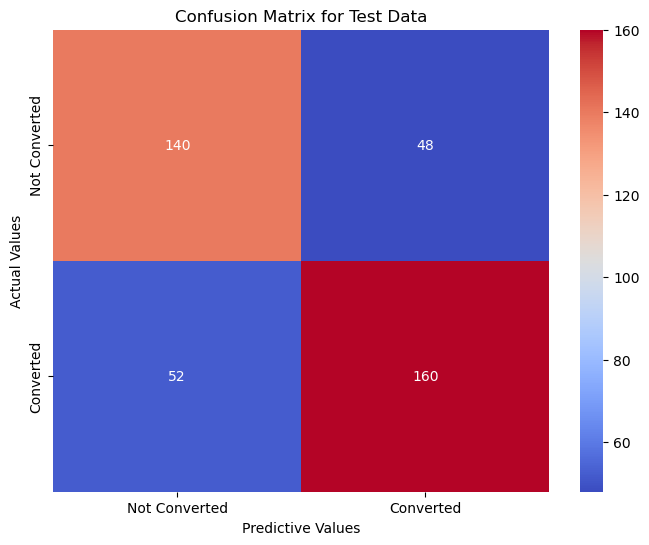

In [46]:
# Plot confusion matrix for the test set
plt.figure(figsize=(8,6))
sns.heatmap(cm_test, 
            annot=True, 
            fmt="d", 
            cmap='coolwarm',
            xticklabels=['Not Converted', 'Converted'],
            yticklabels=['Not Converted', 'Converted'])
plt.title('Confusion Matrix for Test Data')
plt.ylabel('Actual Values')
plt.xlabel('Predictive Values')

# Save plot
plt.savefig('images/conf_matrix_student_loans_test.png', dpi=300)
plt.show()            

#### Analysys and recomendations